In [4]:
import pandas as pd
import datetime as dt
import numpy as np
import json

import seaborn as sns
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [1]:
IN_PATH = '/Users/anokhin/Desktop/sample_SALARY.txt'
OUT_PATH = '/Users/anokhin/Desktop/personal_income_salary.jss'

In [2]:
USER_PATTERN = '{"vid":"","okid":%s,"email":%s,"vkid":%s,"category":{"int":%d}}'
STRING_PATTERN = '{"string":"%s"}'
MONTH_SECONDS = 31 * 24 * 60 * 60

In [15]:
lines = []
with open(IN_PATH, "r") as in_file:
    for i, line in enumerate(in_file):
        if i == 0:
            continue
            
        hh_id, abcde, match_str = line.strip().split("\t")        
        
        match = json.loads(match_str)
        vkids = match.get("vkids", ["None"])
        okids = match.get("okids", ["None"])
        emails = match.get("mails", ["None"])
        
        for vkid in vkids:
            for okid in okids:
                for email in emails:
                    data = {"hh_id": int(hh_id), "cat": int(np.log1p(int(abcde) / 1000) * 10), "email": str(email), "okid": str(okid), "vkid": str(vkid)}
                    lines.append(data)
        
df = pd.DataFrame(lines, columns=['hh_id', 'email', 'okid', 'vkid', 'cat'])
df.head()

,hh_id,email,okid,vkid,cat
0,23666466,None,None,39469849,32
1,45109419,AKNlWzzxEyLfmPR6t6ul3CIR8Jkh5HsV,None,61414726,34
2,45854482,None,None,227568564,35
3,44076491,yHqxCcVDxrvUNBdSwhgwXw==,None,34885941,32
4,40708834,UJWyzb4FUt+cANK/ok64JeTVEQ6hCvVL,None,None,41


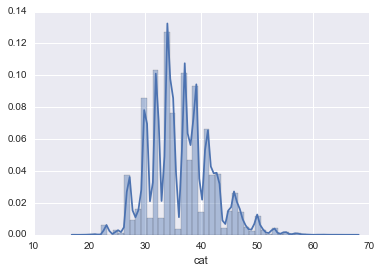

In [16]:
sns.distplot(df["cat"])

In [17]:
with open(OUT_PATH, "w") as out_file:
    for i, row in df.iterrows():
        print >> out_file, USER_PATTERN % (
            (STRING_PATTERN % row["okid"]) if row["okid"] != "None" else "null",
            (STRING_PATTERN % row["email"]) if row["email"] != "None" else "null",
            (STRING_PATTERN % row["vkid"]) if row["vkid"] != "None" else "null",
            row["cat"]
        )

In [18]:
%%bash
head /Users/anokhin/Desktop/personal_income_salary.jss

{"vid":"","okid":null,"email":null,"vkid":{"string":"39469849"},"category":{"int":32}}
{"vid":"","okid":null,"email":{"string":"AKNlWzzxEyLfmPR6t6ul3CIR8Jkh5HsV"},"vkid":{"string":"61414726"},"category":{"int":34}}
{"vid":"","okid":null,"email":null,"vkid":{"string":"227568564"},"category":{"int":35}}
{"vid":"","okid":null,"email":{"string":"yHqxCcVDxrvUNBdSwhgwXw=="},"vkid":{"string":"34885941"},"category":{"int":32}}
{"vid":"","okid":null,"email":{"string":"UJWyzb4FUt+cANK/ok64JeTVEQ6hCvVL"},"vkid":null,"category":{"int":41}}
{"vid":"","okid":null,"email":{"string":"oiuqr0uSW0win5JzKuGQKA=="},"vkid":null,"category":{"int":35}}
{"vid":"","okid":{"string":"518930322032"},"email":{"string":"QS1MkV+94qiEHMkYfWzCSg=="},"vkid":null,"category":{"int":39}}
{"vid":"","okid":null,"email":null,"vkid":{"string":"8010258"},"category":{"int":32}}
{"vid":"","okid":null,"email":{"string":"gNq7kqCVGpnUNBdSwhgwXw=="},"vkid":{"string":"51956605"},"category":{"int":38}}
{"vid":"","okid":null,"email":nul